<a href="https://colab.research.google.com/github/olafLopezF/Trabajo-de-complejidad-algoritmica/blob/main/Trabajo_Final_Complejidad_Algoritmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LIBRERIAS

In [19]:
import math
import numpy as np
import graphviz as gv
import pandas as pd
import heapq as hq
import chardet 
import math

##LEEMOS LOS ARCHIVOS CSV

In [20]:
aeropuertos = pd.read_csv('aerocompletosmodi.csv',encoding='utf-8')
aeropuertos.head()

,IATA,Name
0,GKA,Goroka Airport
1,MAG,Madang Airport
2,HGU,Mount Hagen Kagamuga Airport
3,LAE,Nadzab Airport
4,POM,Port Moresby Jacksons International Airport


In [21]:
rutas = pd.read_csv('vueloscompletosmodi.csv')
rutas.head()

,Source airport,Destination airport,Price
0,AAE,GKA,110
1,AAE,MAG,156
2,AAL,HGU,169
3,AAL,LAE,71
4,AAL,POM,273


##SE CREA LA LISTA ADYACENTE Y LISTA DE NODOS

In [22]:
ady_lista={}
milista=[]

In [23]:
def ad_nodo(nodo):
    if nodo not in milista:
        milista.append(nodo)
    else:
        print("Nodo ", nodo, "ya existe en la lista")
    
with open("aerocompletosmodi.csv",encoding='utf-8') as f:
    next(f)
    for row in f:
        ad_nodo(row.split()[0])    

In [24]:
def ad_arista(nodo1, nodo2):
  temp = []
  if nodo1 in milista and nodo2 in milista:
    if nodo1 not in ady_lista:
      temp.append(nodo2)
      ady_lista[nodo1] = temp
    elif nodo1 in ady_lista:
      temp.extend(ady_lista[nodo1])
      temp.append(nodo2)
      ady_lista[nodo1] = temp
  else:
    print("Nodo no existe")

with open("vueloscompletosmodi.csv",encoding='utf-8') as g:
    next(g)
    for row in g:
        ad_arista(row.split()[0], row.split()[2])

In [25]:
def imprimirlistadeadyacencia():
    for nodo in ady_lista:
        print(nodo, "-->", [i for i in ady_lista[nodo]])

In [26]:
print("El numero de nodos es: ",len(milista))
print("Lista de adyacencia:")
imprimirlistadeadyacencia()

El numero de nodos es:  1000
Lista de adyacencia:
AAE --> ['GKA', 'MAG']
AAL --> ['HGU', 'LAE', 'POM']
AAR --> ['WWK', 'UAK', 'GOH']
ABD --> ['SFJ', 'THU']
ABJ --> ['AEY', 'EGS']
ABS --> ['IFJ', 'KEF', 'RKV']
ABT --> ['YAM', 'YAY']
ABV --> ['YBC', 'YBG']
ABZ --> ['YBK', 'YBL']
ACA --> ['YBR', 'YCB']
ACC --> ['YCD', 'YCG']
ACE --> ['YCL', 'YCO', 'YCY']
ACH --> ['YZS', 'YDF', 'YDQ']
ACI --> ['YEG', 'YEK']
ADA --> ['YEV', 'YFB', 'YFC']
ADB --> ['YFO', 'YFS', 'YGK']
ADD --> ['YGL', 'YGP', 'YGR']
AES --> ['YHD', 'YHI', 'YHK']
AEY --> ['YHM', 'YHU']
AGA --> ['YHY', 'YHZ', 'YIO']
AGB --> ['YJT', 'YKA']
AGF --> ['YKF', 'YKL', 'YLL']
AGP --> ['YLW', 'YMM', 'YMO']
AGU --> ['YNA', 'YOJ']
AHB --> ['YOW', 'YPL']
AHO --> ['YPN', 'YPR', 'YPY']
AHU --> ['YQB', 'YQF', 'YQG']
AIT --> ['YQK', 'YQL']
AJA --> ['YQM', 'YQQ', 'YQR']
AJR --> ['YQT', 'YQU', 'YQX']
AKF --> ['YQY', 'YQZ', 'YRB']
AKL --> ['YRT', 'YSB']
ALC --> ['YSJ', 'YSM', 'YSY']
ALF --> ['YTE', 'YTH', 'YTS']
ALG --> ['YTZ', 'YUB']
AMH --> ['YU

##CLASE GRAFO

In [27]:
class Graph:
  def __init__(self):
    self.Vertices = []
    self.label2v = dict()
    self.G = []

  def node(self, label):
    self.label2v[label] = len(self.Vertices)
    self.Vertices.append(label)
    self.G.append([])

  def nodes(self, labels):
    for label in labels:
      self.node(label)

  def edge(self, u, v):
    u = self.label2v[u]
    v = self.label2v[v]

    self.G[u].append(v)

  def edges(self, u, vs):
    for v in vs:
      self.edge(u, v)

  def Dot(self):
    graph = gv.Digraph("X")
    n = len(self.G)
    for u in range(n):
      graph.node(str(u), str(self.Vertices[u]))

    for u in range(n):
      for v in self.G[u]:
        graph.edge(str(u), str(v))

    return graph

In [28]:
G=Graph()

## SE AGREGAN LOS DATOS A LA CLASE GRAFO

In [29]:
for x in milista:
    G.nodes([x])

keys=[key for key in ady_lista]
value=list(ady_lista.values())

numero=0
for y in ady_lista:
    G.edges(keys[numero],value[numero])
    numero+=1

##SE DIBUJA EL GRAFO OBTENIDO

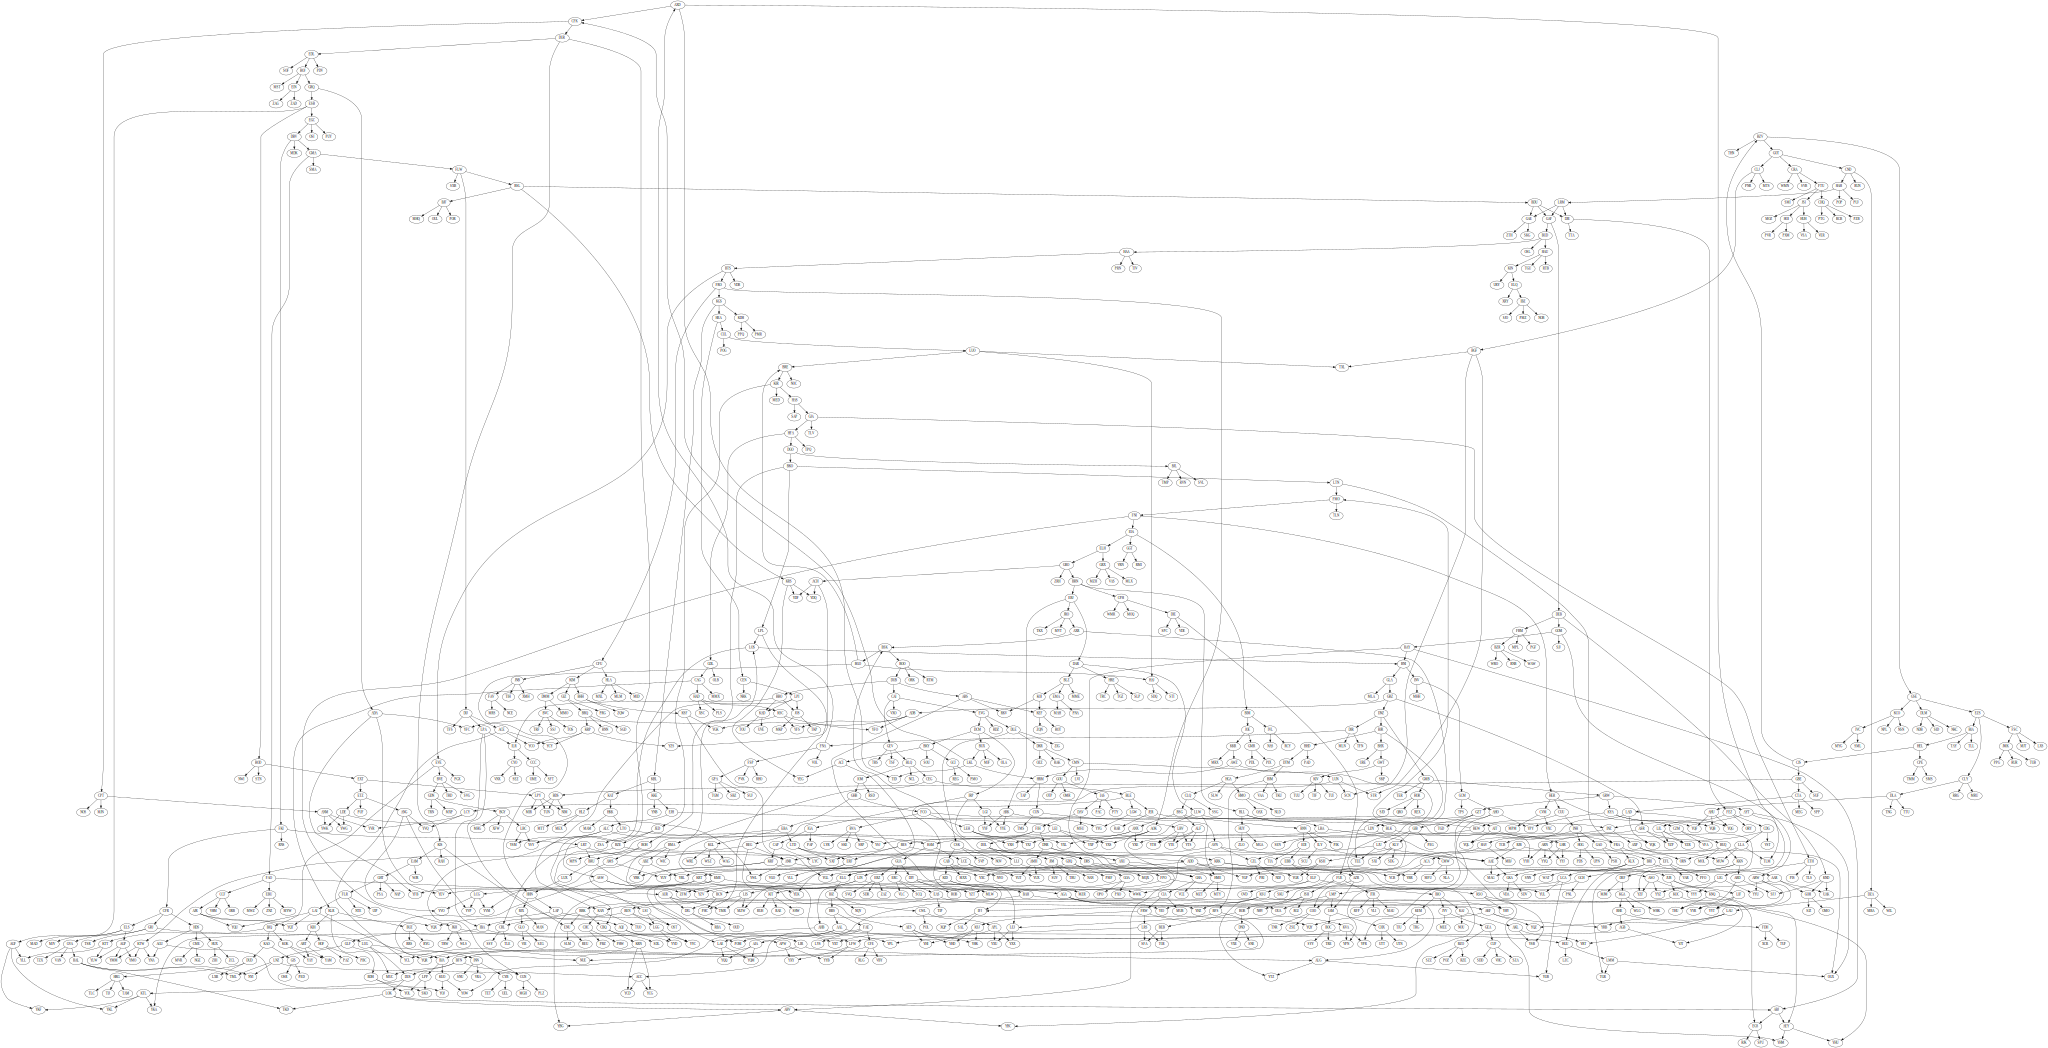

In [30]:
G.Dot()

##IMPLEMENTACION DEL ALGORITMO DE DIJKSTRA

In [31]:
class Node:
    def __init__(self, value, neighbors=None):
        self.value = value
        if neighbors is None:
            self.neighbors = []
        else:
            self.neighbors = neighbors

    def has_neighbors(self):
        if len(self.neighbors) == 0:
            return False
        return True

    
    def number_of_neighbors(self):
        return len(self.neighbors)

    
    def add_neighboor(self, neighboor):
        self.neighbors.append(neighboor)

    def __eq__(self, other):
        return self.value == other

    def __str__(self):
        returned_string = f"{self.value} -> "
        if self.has_neighbors():
            for neighboor in self.neighbors:
                returned_string += f"{neighboor[0].value} -> "  
     
        returned_string += "None"     
        return returned_string


class Graph:
    
    def __init__(self, nodes=None):
        if nodes is None:
            self.nodes = []
        else:
            self.nodes = nodes


    
    def add_node(self, node):
        self.nodes.append(node)


    
    def find_node(self, value):
        for node in self.nodes:
            if node.value == value:
                return node 
        return None


    
    def add_edge(self, value1, value2, weight=1):
        node1 = self.find_node(value1)        
        node2 = self.find_node(value2)

        if (node1 is not None) and (node2 is not None):
            node1.add_neighboor((node2, weight))
            node2.add_neighboor((node1, weight))
        else:
            print("Error: One or more nodes were not found")


    
    def number_of_nodes(self):
        return f"The graph has {len(self.nodes)} nodes"


    
    def are_connected(self, node_one, node_two):
        node_one = self.find_node(node_one)
        node_two = self.find_node(node_two)

        for neighboor in node_one.neighbors:
            if neighboor[0].value == node_two.value:
                return True
        return False


    
    def __str__(self):
        graph = ""
        for node in self.nodes:
            graph += f"{node.__str__()}\n" 
        return graph

In [32]:


class Vertex(Node):
    def __init__(self, value, neighbors=None):
        super().__init__(value, neighbors)
        self.length_from_start = math.inf
        self.previous_node = None
        self.visited = False
    

    
    def distance_from_neighbor(self, node):
        for neighbor in self.neighbors:
            if neighbor[0].value == node.value:
                return neighbor[1]
        return None

    def __str__(self):
       return f"{self.value} {self.length_from_start} {self.previous_node} {self.visited}"




class Dijkstra:
    def __init__(self, graph, start, target):
        self.graph = graph
        self.start = start
        self.target = target
        self.intialization()

    
    def intialization(self):
        for node in self.graph.nodes:
            if node == self.start:
                node.length_from_start = 0
    

    
    def minimum_distance(self):
        next_node = None
        min_value = math.inf
        for node in self.graph.nodes:
            if node.length_from_start < min_value and node.visited == False:
                min_value = node.length_from_start
                next_node = node

        return next_node                


    
    def execution(self):
        target_node = self.graph.find_node(self.target)
        while not target_node.visited:
            
            selected_node = self.minimum_distance()
            
            selected_node.visited = True
            
            for node in selected_node.neighbors:
                connected_node = self.graph.find_node(node[0])
                
                if (selected_node.length_from_start + node[1]) < connected_node.length_from_start:
                    connected_node.length_from_start = selected_node.length_from_start + node[1]
                    connected_node.previous_node = selected_node.value

        
        path = [target_node.value]
        while True:
            node = self.graph.find_node(path[-1])
            if node.previous_node is None:
                break
            path.append(node.previous_node)
        
        path.reverse()    
        return path, target_node.length_from_start

In [41]:
graph = Graph()
for x in milista:
    graph.add_node(Vertex(x))

with open("vueloscompletosmodi.csv",encoding='utf-8') as g:
    next(g)
    for row in g:
        graph.add_edge(row.split()[0],row.split()[2],int(row.split()[4]))

##PEDIMOS LOS DATOS AL USUARIO PARA QUE EL PROGRAMA NOS MUESTRE EL CAMINO MAS CORTO Y EL COSTO TOTAL

In [45]:
primero=input("ingrese el primer aeropuerto: ")
segundo=input("ingrese el segundo aeropuerto: ")
alg = Dijkstra(graph, primero, segundo)
path, path_lenght = alg.execution()
print(" -> ".join(path))
print(f"Precio Total del vuelo: {path_lenght}")

ingrese el primer aeropuerto: TTA
ingrese el segundo aeropuerto: SDV
YUB -> LCA -> EFL -> FRA -> KLX -> GKA -> SDV
Precio Total del vuelo: 1028
